<a href="https://colab.research.google.com/github/Allanx495/Allanx495/blob/main/CA_wildfirse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/content/drive/My Drive/Datasets/California Wildfire Damage.csv')

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Incident_ID,Date,Location,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause
0,INC1000,2020-11-22,Sonoma County,14048,763,474,235,70,19,2270.57,Lightning
1,INC1001,2021-09-23,Sonoma County,33667,1633,4,263,100,2,1381.14,Lightning
2,INC1002,2022-02-10,Shasta County,26394,915,291,31,50,6,2421.96,Human Activity
3,INC1003,2021-05-17,Sonoma County,20004,1220,128,34,28,0,3964.16,Unknown
4,INC1004,2021-09-22,Sonoma County,40320,794,469,147,0,15,1800.09,Unknown


In [ ]:
# Check for missing values:
California_Wildfire_Damage = pd.read_csv('/content/drive/My Drive/Datasets/California Wildfire Damage.csv')
California_Wildfire_Damage.isna().any()

,0
Incident_ID,False
Date,False
Location,False
Area_Burned (Acres),False
Homes_Destroyed,False
Businesses_Destroyed,False
Vehicles_Damaged,False
Injuries,False
Fatalities,False
Estimated_Financial_Loss (Million $),False


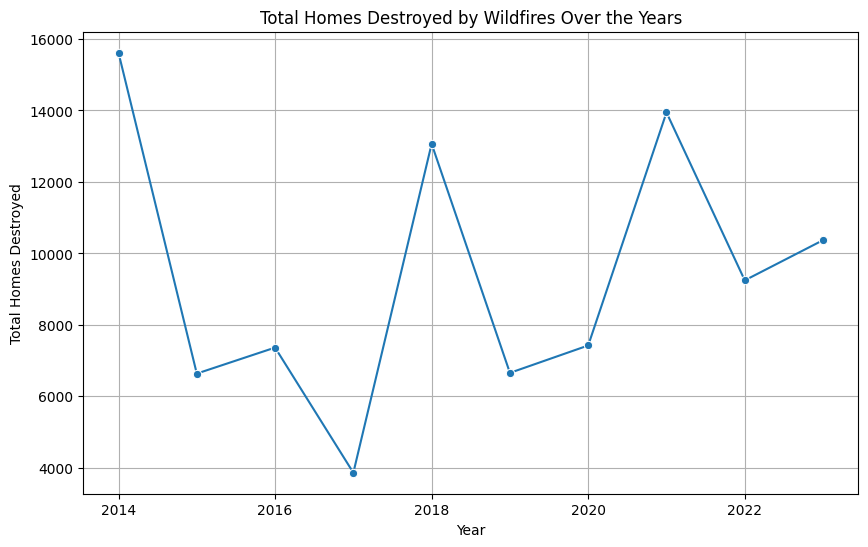

In [ ]:
# Line chart that compares total homes destroyed over the years
# Ensure the Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract Year from Date
df['Year'] = df['Date'].dt.year

# Group by Year and sum the 'Homes_Destroyed' column
yearly_homes_destroyed = df.groupby('Year')['Homes_Destroyed'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_homes_destroyed['Year'], y=yearly_homes_destroyed['Homes_Destroyed'], marker='o')

plt.xlabel('Year')
plt.ylabel('Total Homes Destroyed')
plt.title('Total Homes Destroyed by Wildfires Over the Years')
plt.grid(True)
plt.show()


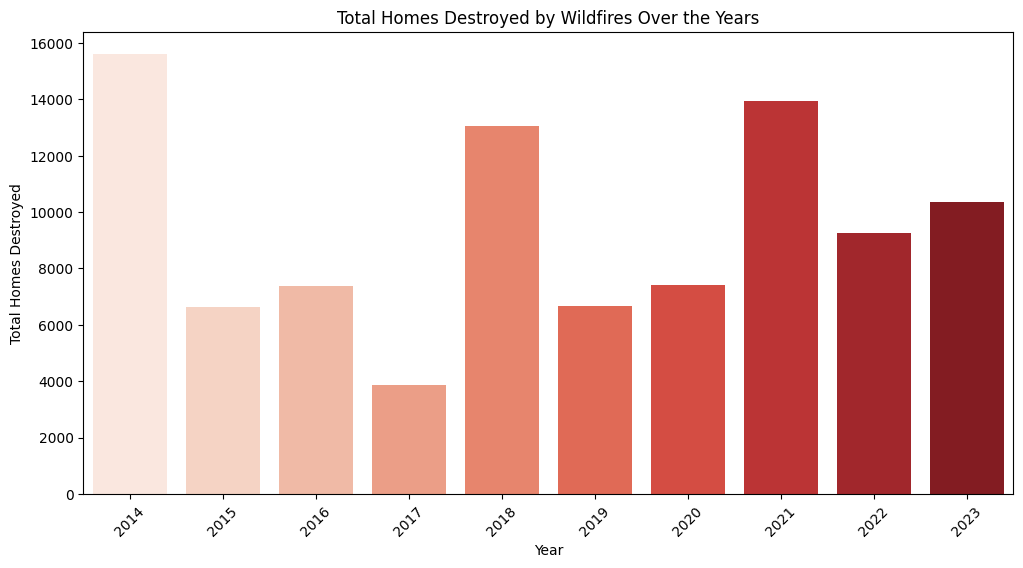

In [ ]:
# Bar chart that shows total homes destroyed over the years (alt view to the line chart)
plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_homes_destroyed['Year'], y=yearly_homes_destroyed['Homes_Destroyed'], palette='Reds')

plt.xlabel('Year')
plt.ylabel('Total Homes Destroyed')
plt.title('Total Homes Destroyed by Wildfires Over the Years')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#PIE Chart
df['Cause'].value_counts()
Cause_Name = df['Cause'].value_counts().index.tolist()
Cause_Name



['Human Activity', 'Unknown', 'Lightning']

In [ ]:
Value = df['Cause'].value_counts().tolist()
Value

[38, 31, 31]

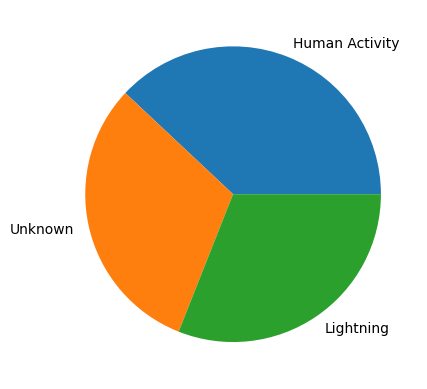

In [ ]:
plt.pie(Value, labels=Cause_Name)
plt.show()

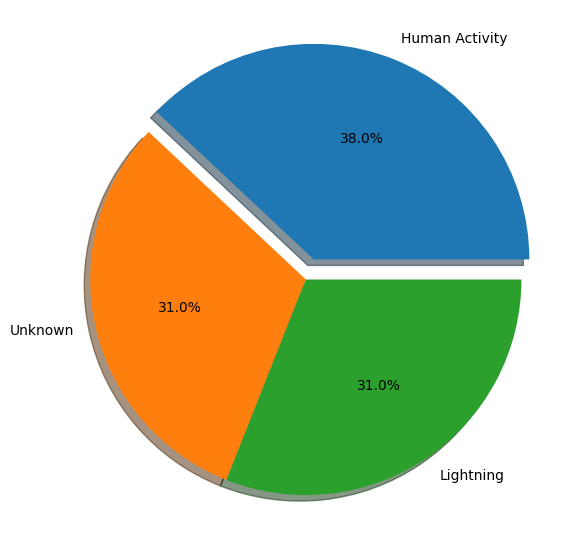

In [ ]:
#Finalize the pie chart with shading and exploding feature
myexplode = [0.1 if country in ['Human Activity'] else 0 for country in Cause_Name]
fig = plt.figure(figsize=(10, 7))
plt.pie(Value, labels=Cause_Name, explode = myexplode, shadow = True, autopct='%1.1f%%')
plt.show()

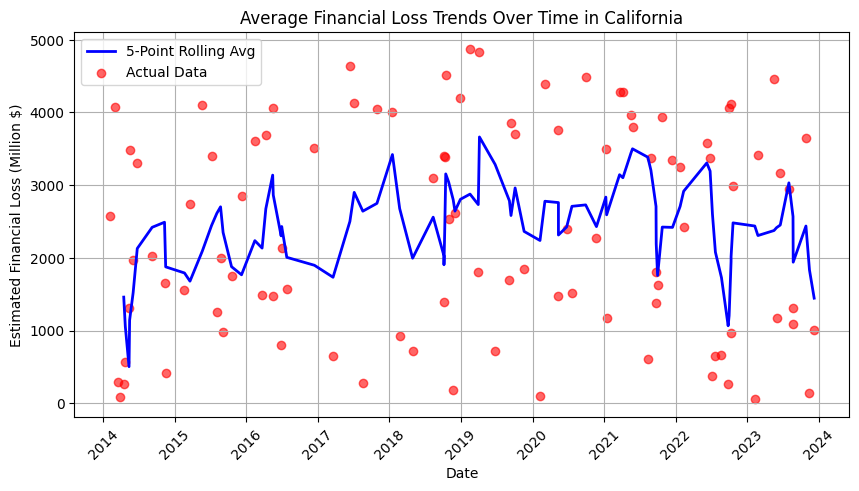

In [ ]:
# Scatter plot with trend line of the average losses per year
df = df.sort_values(by='Date')
df['Rolling_Avg'] = df['Estimated_Financial_Loss (Million $)'].rolling(window=5).mean()

plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Rolling_Avg'], color='blue', linewidth=2, label='5-Point Rolling Avg')
plt.scatter(df['Date'], df['Estimated_Financial_Loss (Million $)'], color='red', alpha=0.6, label='Actual Data')
plt.xlabel('Date')
plt.ylabel('Estimated Financial Loss (Million $)')
plt.title('Average Financial Loss Trends Over Time in California')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


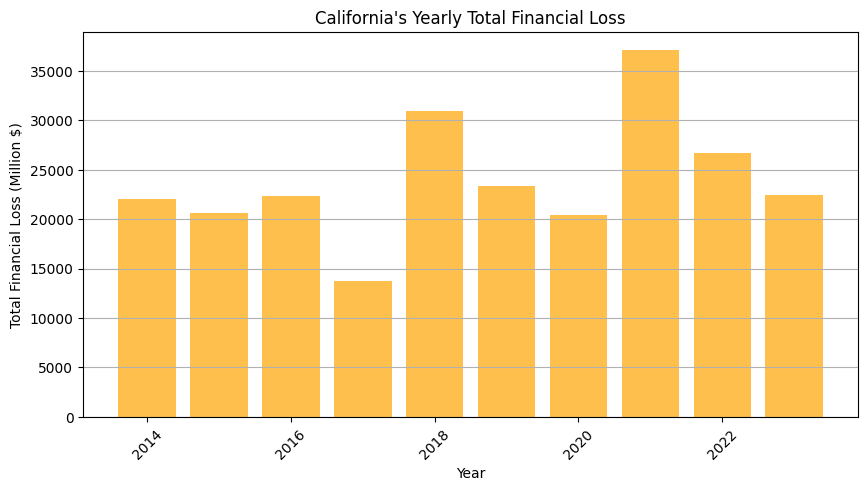

In [ ]:
#Bar chart for the overall financial losses per year
df['Year'] = pd.to_datetime(df['Date']).dt.year
yearly_loss = df.groupby('Year')['Estimated_Financial_Loss (Million $)'].sum()

plt.figure(figsize=(10,5))
plt.bar(yearly_loss.index, yearly_loss.values, color='orange', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Total Financial Loss (Million $)')
plt.title("California's Yearly Total Financial Loss")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



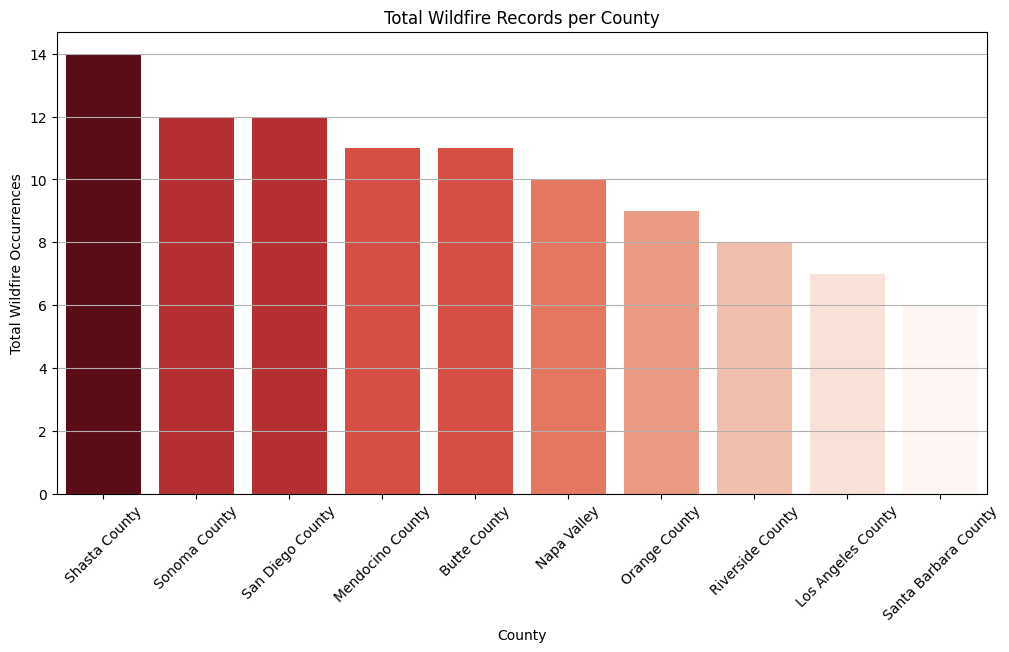

In [ ]:
# Bar chart for total wilffires per county
plt.figure(figsize=(12,6))

# Count occurrences of wildfires per county
wildfire_counts = df['Location'].value_counts()

# Normalize values for color intensity scaling
normalized_values = (wildfire_counts - wildfire_counts.min()) / (wildfire_counts.max() - wildfire_counts.min())

# Generate colors based on intensity, darker red = more fires (vice versa)
colors = sns.color_palette("Reds", as_cmap=True)(normalized_values)

# Plot all 10 counties
sns.barplot(x=wildfire_counts.index, y=wildfire_counts.values, palette=colors)

# Labels and title
plt.xlabel('County')
plt.ylabel('Total Wildfire Occurrences')
plt.title('Total Wildfire Records per County')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()





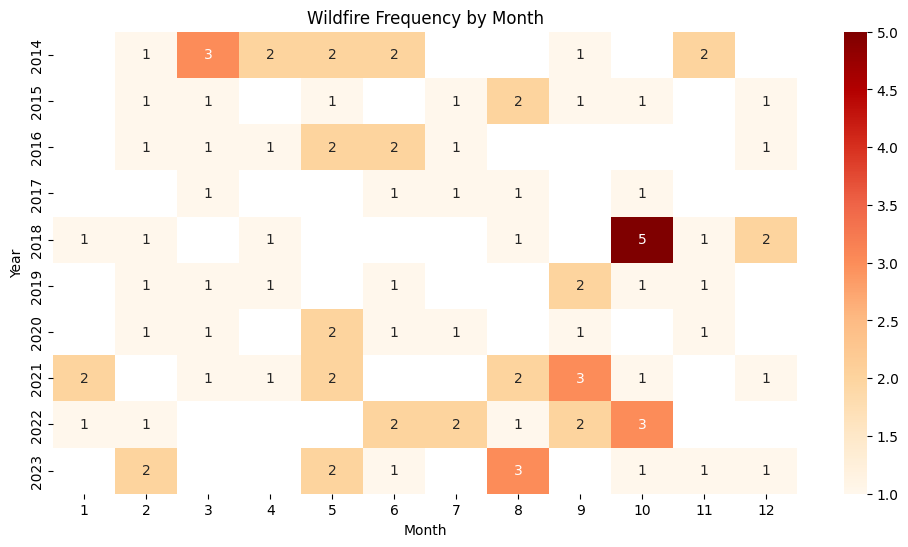

In [ ]:
# Heatmap for the predictions of wildfires per month of each year
df['Date'] = pd.to_datetime(df['Date'])  # Convert Date column to datetime
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

heatmap_data = df.pivot_table(index='Year', columns='Month', values='Incident_ID', aggfunc='count')

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap='OrRd', annot=True, fmt=".0f")
plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Wildfire Frequency by Month')
plt.show()


In [ ]:
#Interactive charts, A bit messy but you can see how: more acres burned = more fiancial loss (usually, especially @ top right corner)
import plotly.express as px

fig = px.scatter(df, x='Area_Burned (Acres)', y='Estimated_Financial_Loss (Million $)',
                 color='Cause', size='Fatalities', hover_data=['Location'])
fig.update_layout(title='Wildfire Impact: Burned Area vs. Financial Loss (Interactive)')
fig.show()



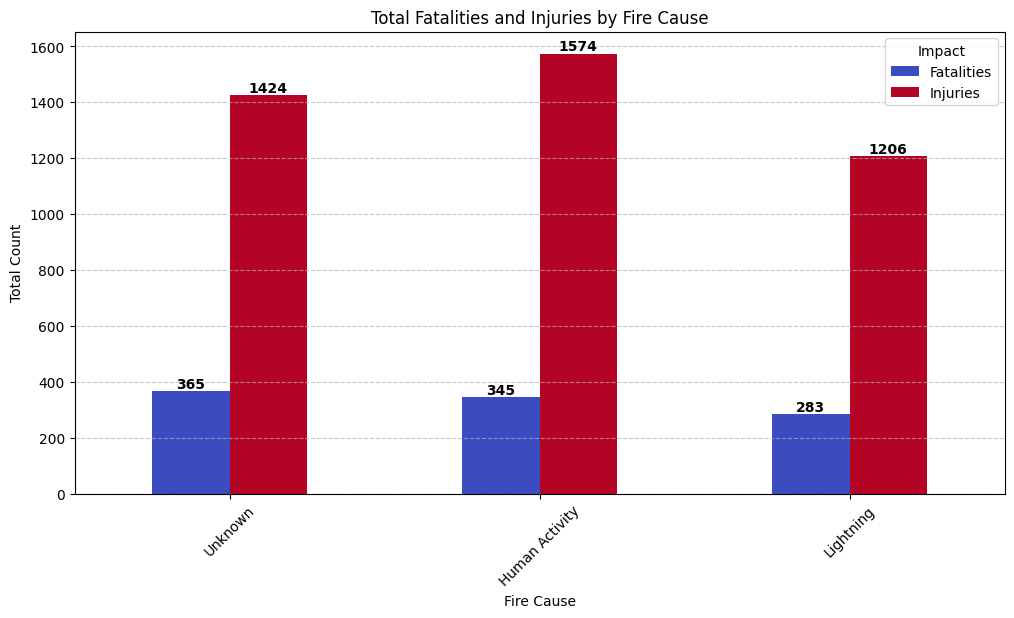

In [ ]:
# Bar chart that shows the fatalities compared to the fire causes
# Make the 'Date' column into datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group data by cause and sum fatalities and injuries
cause_summary = df.groupby('Cause')[['Fatalities', 'Injuries']].sum().sort_values(by='Fatalities', ascending=False)

# Plot a grouped bar chart
plt.figure(figsize=(12,6))
ax = cause_summary.plot(kind='bar', stacked=False, colormap='coolwarm', ax=plt.gca())


plt.xlabel('Fire Cause')
plt.ylabel('Total Count')
plt.title('Total Fatalities and Injuries by Fire Cause')
plt.xticks(rotation=45)
plt.legend(title="Impact", loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels to each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.show()


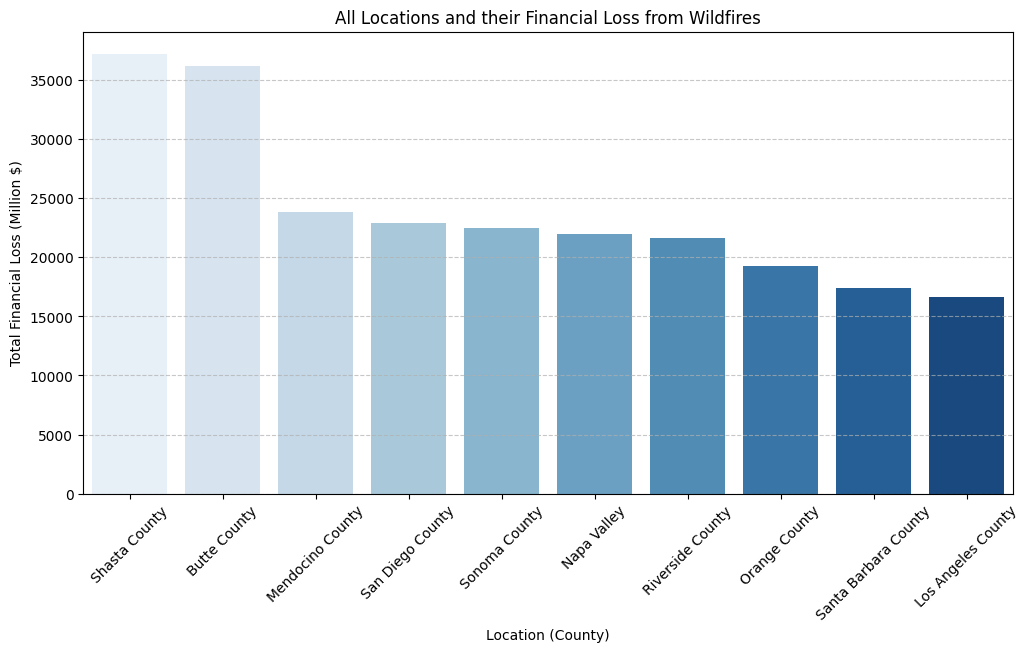

In [ ]:
# Bar chart compares all counties and their total financial losses
# Aggregate total financial loss per location
location_financial_loss = df.groupby('Location')['Estimated_Financial_Loss (Million $)'].sum().sort_values(ascending=False)[:10]

# Plot bar chart
plt.figure(figsize=(12,6))
sns.barplot(x=location_financial_loss.index, y=location_financial_loss.values, palette='Blues')

plt.xlabel('Location (County)')
plt.ylabel('Total Financial Loss (Million $)')
plt.title('All Locations and their Financial Loss from Wildfires')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Map plot that shows all the locations, avg financial loss, fire count

pd.read_csv('/content/drive/My Drive/Datasets/California Wildfire Damage.csv')

# Create a dictionary with the counties coordinates
county_coordinates = {
    "Sonoma County": (38.578, -122.988),
    "Shasta County": (40.790, -122.100),
    "Butte County": (39.625, -121.537),
    "San Diego County": (32.715, -117.161),
    "Napa Valley": (38.502, -122.265),
    "Riverside County": (33.953, -117.396),
    "Santa Barbara County": (34.420, -119.698),
    "Los Angeles County": (34.052, -118.243),
    "Mendocino County": (39.438, -123.371),
    "Orange County": (33.717, -117.831),
}

# Aggregate data: Get the average financial loss and total fire count per county
county_summary = df.groupby('Location').agg(
    avg_financial_loss=('Estimated_Financial_Loss (Million $)', 'mean'),
    total_fires=('Location', 'count'),  # Count occurrences of each county (fire count)
    total_area_burned=('Area_Burned (Acres)', 'sum')  # Sum the burned area per county
).reset_index()

# Map county names to coordinates
county_summary['Latitude'] = county_summary['Location'].map(lambda x: county_coordinates.get(x, (None, None))[0])
county_summary['Longitude'] = county_summary['Location'].map(lambda x: county_coordinates.get(x, (None, None))[1])

# Drop rows where coordinates are missing
county_summary = county_summary.dropna(subset=['Latitude', 'Longitude'])

# Plot the updated map
fig = px.scatter_mapbox(county_summary,
                        lat='Latitude', lon='Longitude',
                        color='total_fires',  # More fires = darker red
                        size='total_area_burned',  # More area burned = bigger circle
                        color_continuous_scale='Reds',  # Use red color scale
                        hover_name='Location',
                        hover_data=['avg_financial_loss', 'total_fires', 'total_area_burned'],
                        mapbox_style="carto-darkmatter",
                        title="California Wildfires (Avg Financial Loss & Fire Frequency)")

# Adjust zoom and center for a better view
fig.update_layout(mapbox=dict(center=dict(lat=37.5, lon=-119.5), zoom=4))


fig.show()
